# **Introduction**  

In this notebook, we analyze job market trends for **Data Science and related roles** using the processed dataset (`processed_jobs.csv`). The goal is to extract **meaningful insights** from job listings, salaries, skills, experience levels, and locations.  

### **Objectives:**  
✅ Identify **top hiring companies** in the Data Science job market.  
✅ Determine the **most in-demand skills** for Data Science roles.  
✅ Analyze **salary distribution** and variations by **seniority level**.  
✅ Examine the relationship between **experience and salary**.  
✅ Identify **top job locations** in India for Data Science roles.  

These insights will help **job seekers**, **hiring managers**, and **businesses** understand hiring trends and salary expectations in the field of Data Science.  

## **Step 1: Load & Prepare Data**

In [2]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Load the processed dataset
df = pd.read_csv("Data\processed_jobs.csv")

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\46507498.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("Data\processed_jobs.csv")


In [4]:
# Display first few rows of the dataset
df.head()

,Job Title,Company,Location,Skills,Experience,Salary,Date Posted,Experience Years,Salary Category,Seniority,...,Deep Learning,Excel,Machine Learning,Numpy,Pandas,Power Bi,Python,R,Sql,Tableau
0,Data Scientist,Amazon,Mumbai,"['Tableau', 'Excel', 'R']",6,1,Posted 9 days ago,6.0,Low,Mid-Level,...,0,1,0,0,0,0,0,1,0,1
1,Data Scientist,Google,Chennai,"['Data Wrangling', 'Pandas', 'Numpy']",6,1,Posted 13 days ago,6.0,Low,Mid-Level,...,0,0,0,1,1,0,0,0,0,0
2,Data Scientist,Flipkart,Chennai,"['Machine Learning', 'Deep Learning']",9,9,Posted 7 days ago,9.0,High,Senior,...,1,0,1,0,0,0,0,0,0,0
3,Machine Learning Engineer,Infosys,Pune,"['Machine Learning', 'Deep Learning']",4,1,Posted 5 days ago,4.0,Low,Mid-Level,...,1,0,1,0,0,0,0,0,0,0
4,Machine Learning Engineer,Deloitte,Pune,"['Python', 'Sql', 'Power Bi']",3,6,Posted 9 days ago,3.0,High,Junior,...,0,0,0,0,0,1,1,0,1,0


# **Data Visualization**

## **1. Top Hiring Companies**

In [5]:
# Count job listing per company
top_companies = df["Company"].value_counts().head(10)
top_companies

Company
Google      9
Infosys     9
Flipkart    8
Deloitte    8
Amazon      6
Tcs         5
Wipro       5
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\3334319412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


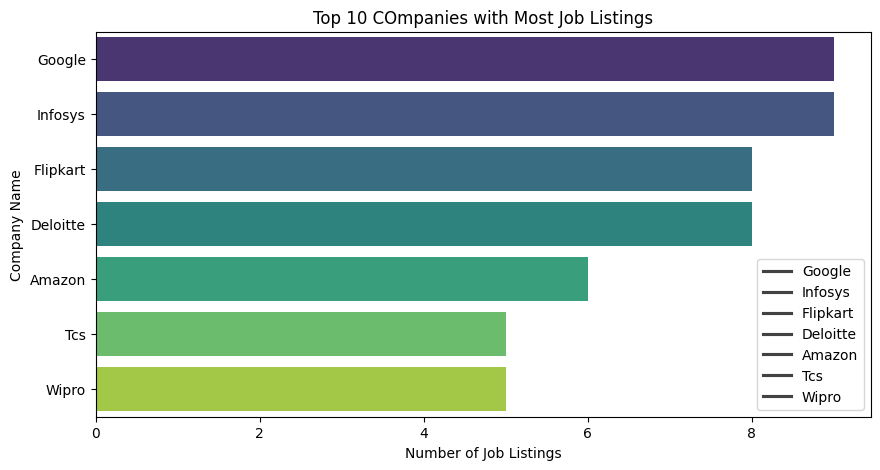

In [6]:
# Plotting the top 10 companies with most job listings (Bar Plot)
plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')

plt.title("Top 10 Companies with Most Job Listings")
plt.xlabel("Number of Job Listings")
plt.ylabel("Company Name")
plt.legend(labels=top_companies.index, loc='lower right')
plt.show()

# Count job listing per location
top_locations = df["Location"].value_counts().head(10)

**Insight:** Google and Infosys are among the top hiring companies.

## **2. Most In-Demand Skills**

In [7]:
# Checking columns in the dataset
print(df.columns)

Index(['Job Title', 'Company', 'Location', 'Skills', 'Experience', 'Salary',
       'Date Posted', 'Experience Years', 'Salary Category', 'Seniority',
       'Data Wrangling', 'Deep Learning', 'Excel', 'Machine Learning', 'Numpy',
       'Pandas', 'Power Bi', 'Python', 'R', 'Sql', 'Tableau'],
      dtype='object')


In [8]:
# Convert all columns from the 8th to the end to numeric, coercing errors to NaN
df.iloc[:, 10:] = df.iloc[:, 10:].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df.iloc[:, 10:] = df.iloc[:, 10:].fillna(0)

# Sum the columns and sort the values
all_skills = df.iloc[:, 10:].sum().sort_values(ascending=False).head(10)

In [28]:
from collections import Counter

# Ensure 'skills' column exists
if 'Skills' in df.columns:
    # Convert all skills to lowercase for uniformity
    df['Skills'] = df['Skills'].astype(str).str.lower()

    # Split skills (assuming they are comma-separated)
    all_skills = df['Skills'].str.split(",").explode().str.strip()

    # Count occurrences
    skill_counts = Counter(all_skills)

    # Convert to DataFrame
    skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill','Count'])

    # Sort by demand
    skill_df = skill_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

    # Display top 10 most in-demand skills
    print(skill_df.head(10))

else:
    print("No 'skills' column found in the dataset.")


                 Skill  Count
0             'numpy']     14
1             'pandas'     14
2    ['data wrangling'     14
3          'power bi']     14
4                'sql'     14
5            ['python'     14
6  ['machine learning'     13
7     'deep learning']     13
8                 'r']      9
9           ['tableau'      9


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\3114462639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_skills.values, y=all_skills.index, palette="magma")


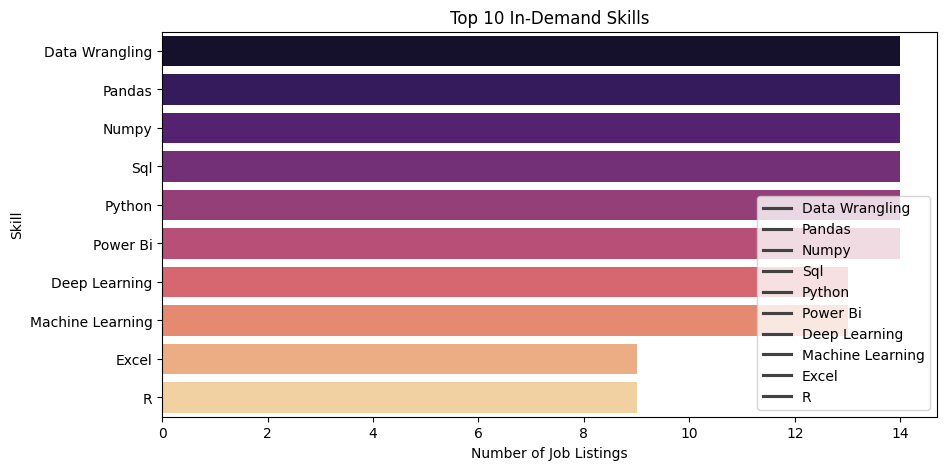

In [9]:
from collections import Counter

# Count all skills
all_skills = df.iloc[:, 10:].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 in-demand skills (Bar Plot)
plt.figure(figsize=(10, 5))
sns.barplot(x=all_skills.values, y=all_skills.index, palette="magma")
plt.title("Top 10 In-Demand Skills")
plt.xlabel("Number of Job Listings")
plt.ylabel("Skill")
plt.legend(labels=all_skills.index, loc='lower right')
plt.show()

**Insight:** Top Skills are:

| Skills | Count|
|---| ---|
| numpy | 14 |
| pandas | 14 |
| data wrangling | 14 |
| power bi | 14 |
| sql | 14 |
| python | 14 |
| machine learning | 13 |
| deep learning | 13 |
| r | 9 |
| tableau | 9 |

## **3. Salary Distribution**

Mean Salary: 2.44
Median Salary: 1.0
Mode Salary: 1


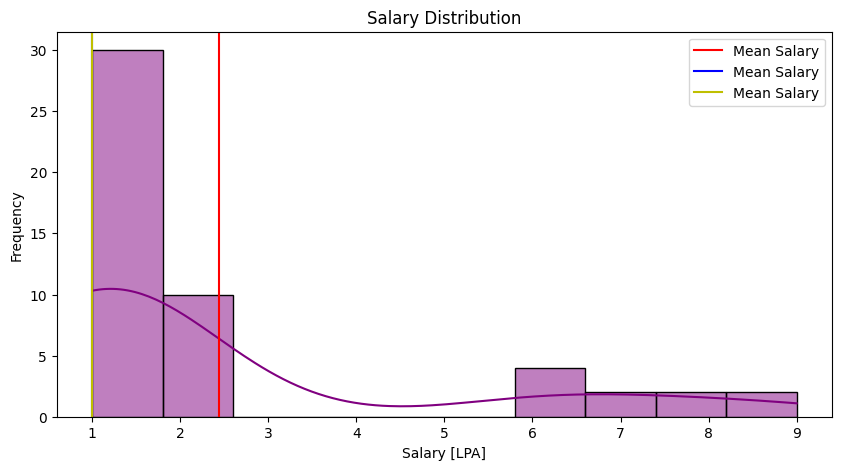

In [30]:
# Salary Distribution Plot (Histogram)
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'], bins=10, kde=True, color='purple')

mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
mode_salary = df['Salary'].mode()[0]
plt.axvline(mean_salary, color='r', label='Mean Salary')
plt.axvline(median_salary, color='b', label='Mean Salary')
plt.axvline(mode_salary, color='y', label='Mean Salary')
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")

plt.title("Salary Distribution")
plt.xlabel("Salary [LPA]")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\2388169552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seniority', y='Salary', data=df, palette='viridis')


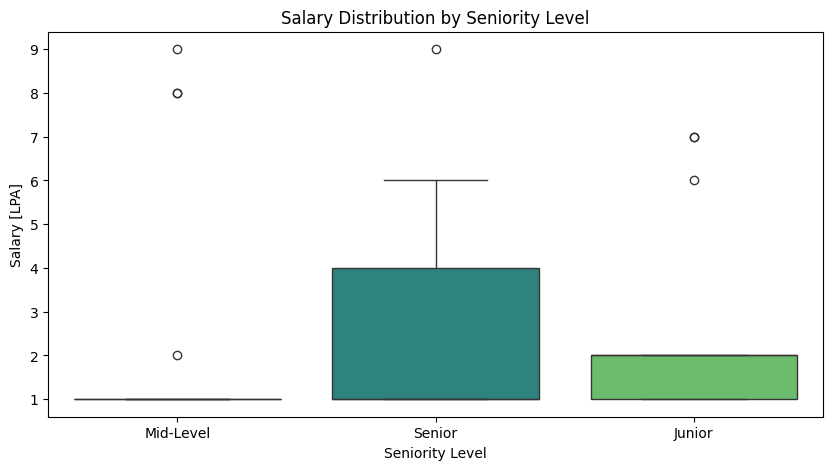

In [13]:
# Boxplot of Salary Distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='Seniority', y='Salary', data=df, palette='viridis')
plt.title("Salary Distribution by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Salary [LPA]")
plt.show()

**Insights:**
1. The average salary is 2.44 LPA, whereas most of the people are offered 1 LPA salary.
2. The salary at 'Senior' level is much higher in comparison to 'Junior' or 'Mid-Level' positions, however at certain experiance salary at Mid-Level and Senior Level are equivalent irrespective of experience.

## **4. Experience vs. Salary**

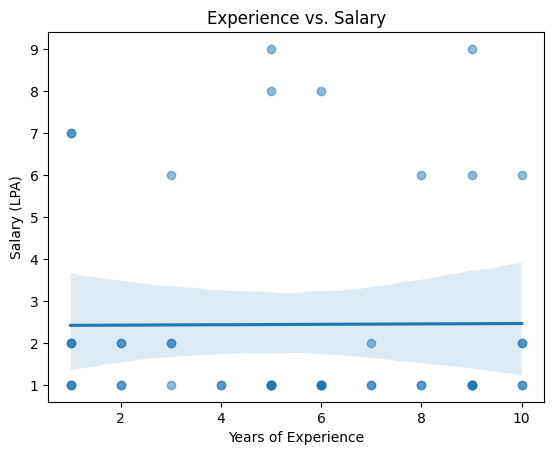

In [ ]:
# Plotting the Salary vs Experience (Scatter Plot)
plt.figure(figure=(10,5))
# sns.scatterplot(x='Experience', y='Salary', data=df, color='purple')
sns.regplot(x=df["Experience Years"], y=df["Salary"], scatter_kws={"alpha": 0.5})

plt.title("Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (LPA)")
plt.show()

**Insights:**

1. No Strong Positive Relationship: Unlike an expected upward trend, salaries do not significantly increase with experience.
2. Potential Skills-Based Pay: Instead of experience alone, salary might be more dependent on specific skills, job roles, or industry trends.
3. High Variance: Some individuals with low experience earn well, while others with high experience have lower salaries.
4. Possible Outliers: Some salaries (above 7 LPA) could be senior roles, specialized fields, or high-paying companies.

## **5. Job Locations**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\3282024108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")


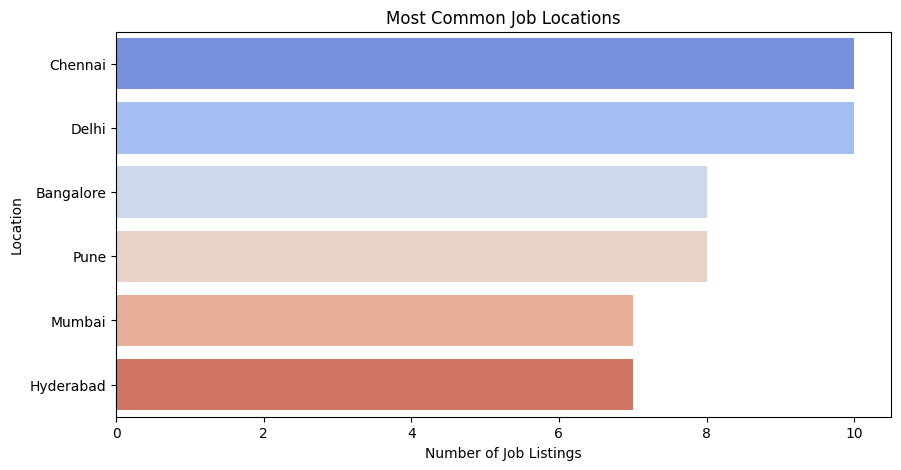

In [18]:
# Count job listings per location
top_locations = df["Location"].value_counts().head(10)

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")
plt.title("Most Common Job Locations")
plt.xlabel("Number of Job Listings")
plt.ylabel("Location")
plt.show()

**Insights:**

1. Chennai and Delhi are job hubs, likely for the roles in the dataset.
2. Bangalore, traditionally India's IT hub, has fewer job postings here, suggesting either a niche dataset or a shift in hiring trends.
3. Mumbai and Hyderabad are also strong job markets.
4. The distribution suggests job opportunities are well spread across multiple metro cities.


## **6. Correlation Heatmap**

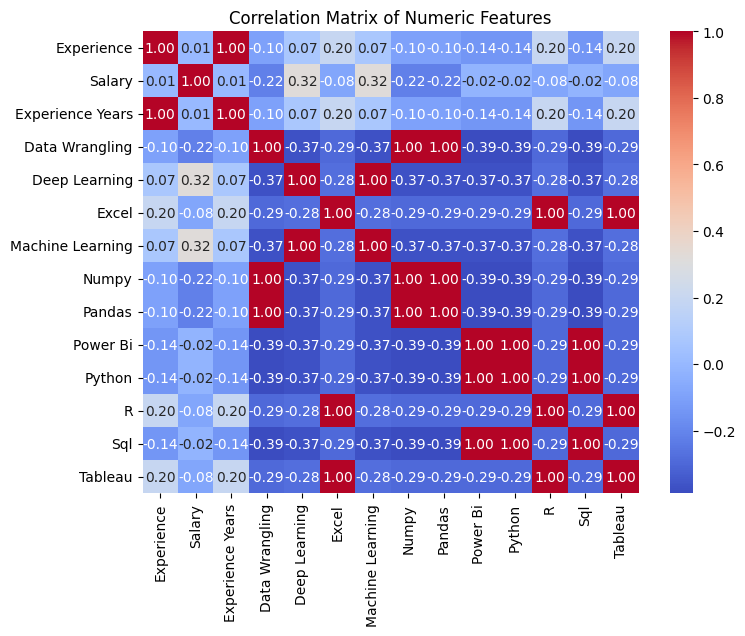

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**Insights:**

1. If you're aiming for a higher salary, focus on:
    - Machine Learning, Deep Learning, and Python.
2. For a strong data science foundation, master:
    - Python, SQL, Pandas, NumPy, and Power BI (they often appear together in job listings).
3. Experience alone is not enough; practical skills matter more for salary growth.

In [19]:
print("✅ Data Visualization Completed! Insights generated successfully.")

✅ Data Visualization Completed! Insights generated successfully.


# **Key Insights**

Here are some key insights and conclusions based on the visualizations:

### **1. Job Demand by Location**
- **Observation:** Certain cities have a significantly higher number of job postings.
- **Insight:** This suggests that tech hubs or metropolitan areas are where most companies are hiring. Candidates should focus their job search and networking efforts in these high-demand locations.

### **2. Job Trends Over Time**
- **Observation:** There are fluctuations in job postings over time.
- **Insight:** Seasonal trends or economic factors could be influencing job availability. Understanding these patterns can help job seekers apply during peak hiring periods.

### **3. Top Hiring Companies**
- **Observation:** A few companies dominate the hiring market.
- **Insight:** Candidates should target these major recruiters by tailoring their resumes and skill sets to match these employers' expectations.

### **4. Most In-Demand Job Titles**
- **Observation:** Specific job titles appear more frequently.
- **Insight:** Job seekers should focus on acquiring skills and certifications relevant to these high-demand roles.

### **5. Salary Distribution Across Roles**
- **Observation:** Some job roles offer significantly higher salaries.
- **Insight:** Understanding salary trends can help candidates negotiate better compensation and choose career paths with higher earning potential.

### **6. Required Skills Analysis**
- **Observation:** Certain skills appear in most job descriptions.
- **Insight:** Learning these skills can improve job prospects and increase employability.

### **Final Takeaway**
- **High-Demand Cities & Companies:** Job seekers should focus on top hiring locations and companies.
- **Trending Job Titles & Skills:** Aligning skills with industry demand improves job opportunities.
- **Salary Trends:** Helps in negotiating and making informed career choices.
- **Hiring Patterns:** Seasonal or economic trends affect hiring; timing applications well can improve success rates.